# Project drug prediction using classifiers including Naive Bayes

In [1]:
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
import pylab as pl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

## Drug Prediction

- The dataset consist of features which are measured from a physical tests on patients with chronic throat infections.

- They describe characteristics of the **chronic throat infection patient** using above tests.

- Attribute Information:
  
  - **Id** number

  - Y variable is **Drug** (X,Y, A, B, C) used to treat the throat infection of patients based on certain criterion using above measured physical test results

<br> 

- 6 real-valued features are computed for each person:

| **Column Name** | **Description** |
|:---------------:|:---------------:|
| **Id** | Unique Id of the sample. |
| **Age** | Age of the person. |
| **Sex** | The sex of the person(M and F). |
| **BP** | Blood pressure of the person. |
| **Cholestrol** | The level of cholesterol in a person's body. |
| **Na_to_K** | Sodium and potassium ratio |
| **Drug** | Contains 5 classes of drugs (drug A, drug B, drug C, drug X, drug Y). |

<br> 

- As you can see we have **7 base column** names mentioned above.
- Age and Na_to-K are numerical columns
- Drug candidates and Sex BP, Cholestrol are categorical
- All feature values are recoded with **3 significant** digits.
- Missing attribute values: **none**
- Class distribution: multiclass Drug candidates X, Y, A, B, C

### Import the dataset

In [2]:
import pandas as pd

In [3]:
drug_train = pd.read_csv('drug_train.csv')
drug_test = pd.read_csv('drug_test.csv')
drug_train.head()

,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,79,32,F,LOW,NORMAL,10.84000,drugX
1,197,52,M,NORMAL,HIGH,9.89400,drugX
2,38,39,F,NORMAL,NORMAL,9.70900,drugX
3,24,33,F,LOW,HIGH,33.48600,DrugY
4,122,34,M,NORMAL,HIGH,22.45600,DrugY


#### Check the shape of the dataset

In [4]:
drug_train.shape

(160, 7)

#### Check the columns present in the dataset

In [5]:
drug_train.columns

Index(['Id', 'Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

#### Count of Drug variable.

<AxesSubplot:>

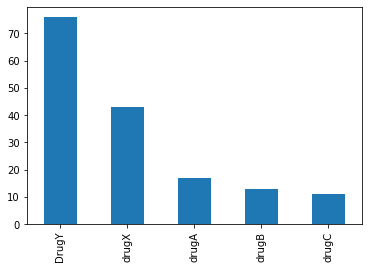

In [6]:
drug_train.Drug.value_counts().plot.bar()

<AxesSubplot:>

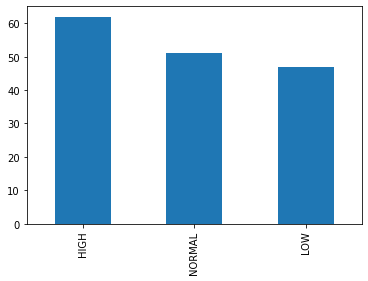

In [7]:
drug_train.BP.value_counts().plot.bar()

<AxesSubplot:>

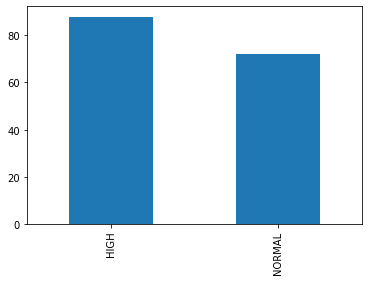

In [8]:
drug_train.Cholesterol.value_counts().plot.bar()

<AxesSubplot:>

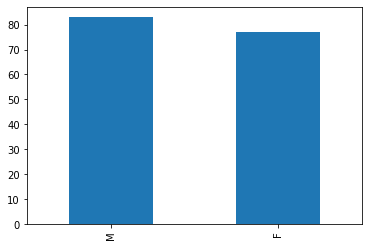

In [9]:
drug_train.Sex.value_counts().plot.bar()

<AxesSubplot:>

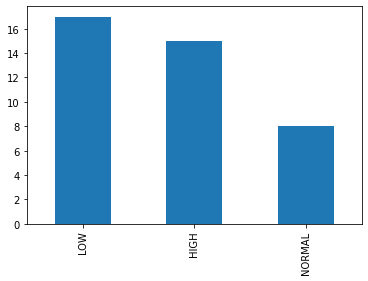

In [10]:
drug_test.BP.value_counts().plot.bar()

<AxesSubplot:>

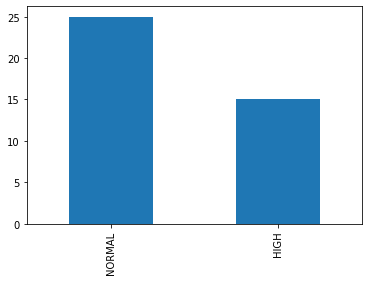

In [11]:
drug_test.Cholesterol.value_counts().plot.bar()

<AxesSubplot:>

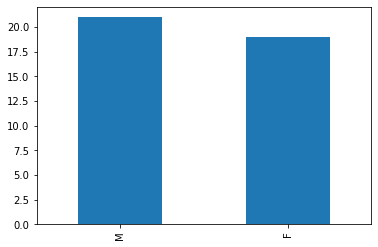

In [12]:
drug_test.Sex.value_counts().plot.bar()

In [13]:
 drug_test.Na_to_K.value_counts()

18.29500    2
29.87500    1
15.51600    1
7.34000     1
7.26100     1
29.27100    1
19.01100    1
9.71200     1
25.96900    1
10.44400    1
7.29800     1
11.19800    1
12.49500    1
11.42400    1
19.36800    1
9.84900     1
8.75000     1
19.00700    1
12.76600    1
27.05000    1
11.34000    1
8.70000     1
12.89400    1
13.59800    1
13.31300    1
11.93900    1
11.45500    1
33.54200    1
14.16000    1
24.27600    1
8.10700     1
12.85600    1
28.29400    1
10.83200    1
11.68600    1
24.65800    1
10.06700    1
20.90900    1
12.87900    1
Name: Na_to_K, dtype: int64

#### Check the info of the dataset

In [14]:
drug_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           160 non-null    int64  
 1   Age          160 non-null    int64  
 2   Sex          160 non-null    object 
 3   BP           160 non-null    object 
 4   Cholesterol  160 non-null    object 
 5   Na_to_K      160 non-null    float64
 6   Drug         160 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.9+ KB


In [15]:
drug_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           40 non-null     int64  
 1   Age          40 non-null     int64  
 2   Sex          40 non-null     object 
 3   BP           40 non-null     object 
 4   Cholesterol  40 non-null     object 
 5   Na_to_K      40 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.0+ KB


<AxesSubplot:>

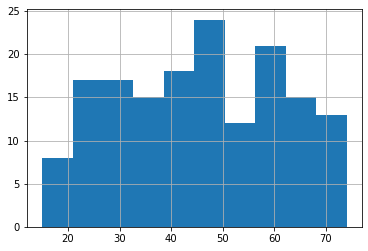

In [16]:
drug_train['Age'].hist()

<AxesSubplot:>

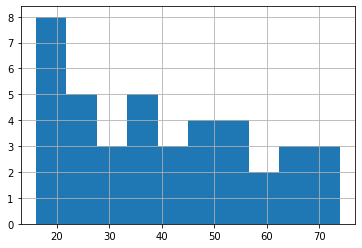

In [17]:
drug_test['Age'].hist()

<AxesSubplot:>

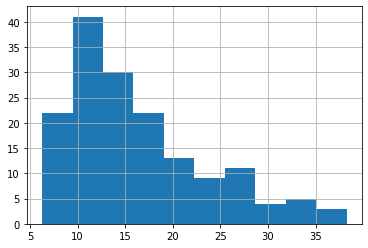

In [18]:
drug_train['Na_to_K'].hist()

<AxesSubplot:>

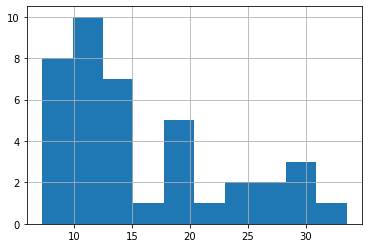

In [19]:
drug_test['Na_to_K'].hist()

<AxesSubplot:>

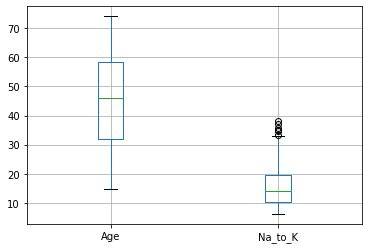

In [20]:
drug_train.boxplot(column=[ 'Age', 'Na_to_K'])

<AxesSubplot:>

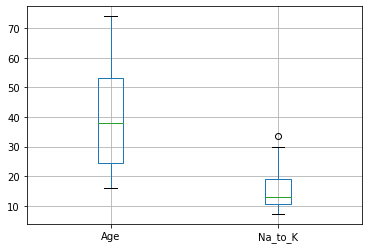

In [21]:
drug_test.boxplot(column=[ 'Age', 'Na_to_K'])

#### Check the descriptive statisticss of the dataset

In [22]:
drug_train.describe(include='all')

,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,160.00000,160.00000,160,160,160,160.00000,160
unique,NaN,NaN,2,3,2,NaN,5
top,NaN,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,NaN,83,62,88,NaN,76
mean,99.07500,45.38750,NaN,NaN,NaN,16.19499,NaN
std,59.37489,16.10148,NaN,NaN,NaN,7.25469,NaN
min,0.00000,15.00000,NaN,NaN,NaN,6.26900,NaN
25%,45.50000,32.00000,NaN,NaN,NaN,10.44525,NaN
50%,100.50000,46.00000,NaN,NaN,NaN,14.07650,NaN
75%,149.50000,58.25000,NaN,NaN,NaN,19.48075,NaN


In [23]:
drug_test.describe(include='all')

,Id,Age,Sex,BP,Cholesterol,Na_to_K
count,40.00000,40.00000,40,40,40,40.00000
unique,NaN,NaN,2,3,2,NaN
top,NaN,NaN,M,LOW,NORMAL,NaN
freq,NaN,NaN,21,17,25,NaN
mean,101.20000,40.02500,NaN,NaN,NaN,15.64247
std,52.12667,17.77853,NaN,NaN,NaN,7.17349
min,9.00000,16.00000,NaN,NaN,NaN,7.26100
25%,65.75000,24.50000,NaN,NaN,NaN,10.73500
50%,94.00000,38.00000,NaN,NaN,NaN,12.86750
75%,148.50000,53.25000,NaN,NaN,NaN,19.10025


###  Write code to check the missing values present in the dataset. 

In [24]:

 drug_train.isnull().sum()
    

Id             0
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [25]:
drug_test.isnull().sum()

Id             0
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
dtype: int64

### Convert the categorical variable `Sex` and 'Cholestrol' to binary (0 and 1 values) using the map function. 

In [26]:
def generate():
    
    drug_train['Sex']= drug_train['Sex'].map({'F': 0, 'M': 1})
    return drug_train['Sex']
drug_train['Sex'] = generate()
drug_train['Sex'].value_counts()

1    83
0    77
Name: Sex, dtype: int64

In [27]:
def generate():
    
    drug_test['Sex']= drug_test['Sex'].map({'F': 0, 'M': 1})
    return drug_test['Sex']
drug_test['Sex'] = generate()
drug_test['Sex'].value_counts()

1    21
0    19
Name: Sex, dtype: int64

In [28]:
def generate():
    
    drug_train['Cholesterol']= drug_train['Cholesterol'].map({'HIGH': 0, 'NORMAL': 1})
    return drug_train['Cholesterol']
drug_train['Cholesterol'] = generate()
drug_train['Cholesterol'].value_counts()

0    88
1    72
Name: Cholesterol, dtype: int64

In [29]:
def generate():
    
    drug_test['Cholesterol']= drug_test['Cholesterol'].map({'HIGH': 0, 'NORMAL': 1})
    return drug_test['Cholesterol']
drug_test['Cholesterol'] = generate()
drug_test['Cholesterol'].value_counts()

1    25
0    15
Name: Cholesterol, dtype: int64

In [30]:
print(drug_train.duplicated())

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [31]:
drug_test.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
dtype: bool

In [32]:
drug_train.drop_duplicates()

,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,79,32,0,LOW,1,10.84000,drugX
1,197,52,1,NORMAL,0,9.89400,drugX
2,38,39,0,NORMAL,1,9.70900,drugX
3,24,33,0,LOW,0,33.48600,DrugY
4,122,34,1,NORMAL,0,22.45600,DrugY
5,195,56,0,LOW,0,11.56700,drugC
6,29,45,1,LOW,0,17.95100,DrugY
7,19,32,0,HIGH,1,25.97400,DrugY
8,143,74,1,HIGH,1,15.43600,DrugY
9,86,51,0,NORMAL,0,13.59700,drugX


**Observations**
- no duplicates

In [33]:
drug_train['Na_to_K'].groupby(drug_train['Drug']).agg('min')

Drug
DrugY   15.01500
drugA    6.26900
drugB    8.62100
drugC    6.76900
drugX    6.68300
Name: Na_to_K, dtype: float64

**Observations**
- DrugY has min of Na to K ratio of 15.015 

# OHE encoding

In [34]:
# Creating dummy variables for the variable 'BP'. 
s_m1 = pd.get_dummies(drug_train['BP'], prefix='BP',drop_first=True)
s_m2 = pd.get_dummies(drug_test['BP'], prefix='BP',drop_first=True)
#sm1 = s_m1.drop(['StreamingMovies_No internet service'], 1)
#sm2 = s_m2.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
drug_train = pd.concat([drug_train,s_m1], axis=1)
drug_test = pd.concat([drug_test,s_m2], axis=1)
drug_train.head()

,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug,BP_LOW,BP_NORMAL
0,79,32,0,LOW,1,10.84000,drugX,1,0
1,197,52,1,NORMAL,0,9.89400,drugX,0,1
2,38,39,0,NORMAL,1,9.70900,drugX,0,1
3,24,33,0,LOW,0,33.48600,DrugY,1,0
4,122,34,1,NORMAL,0,22.45600,DrugY,0,1


In [35]:
drug_train.set_index(['Id'],inplace=True)
drug_test.set_index(['Id'],inplace=True)
drug_test.head()

,Age,Sex,BP,Cholesterol,Na_to_K,BP_LOW,BP_NORMAL
Id,,,,,,,
95,36,1,LOW,1,11.42400,1,0
15,16,0,HIGH,1,15.51600,0,0
30,18,0,NORMAL,1,8.75000,0,1
158,59,0,LOW,0,10.44400,1,0
128,47,1,LOW,1,33.54200,1,0


In [36]:
drug_train.drop(['BP'],axis=1,inplace=True)

In [37]:
drug_test.drop(['BP'],axis=1,inplace=True)

In [38]:
drug_test.head()

,Age,Sex,Cholesterol,Na_to_K,BP_LOW,BP_NORMAL
Id,,,,,,
95,36,1,1,11.42400,1,0
15,16,0,1,15.51600,0,0
30,18,0,1,8.75000,0,1
158,59,0,0,10.44400,1,0
128,47,1,1,33.54200,1,0


Text(0.5, 1.0, 'Correlation between features')

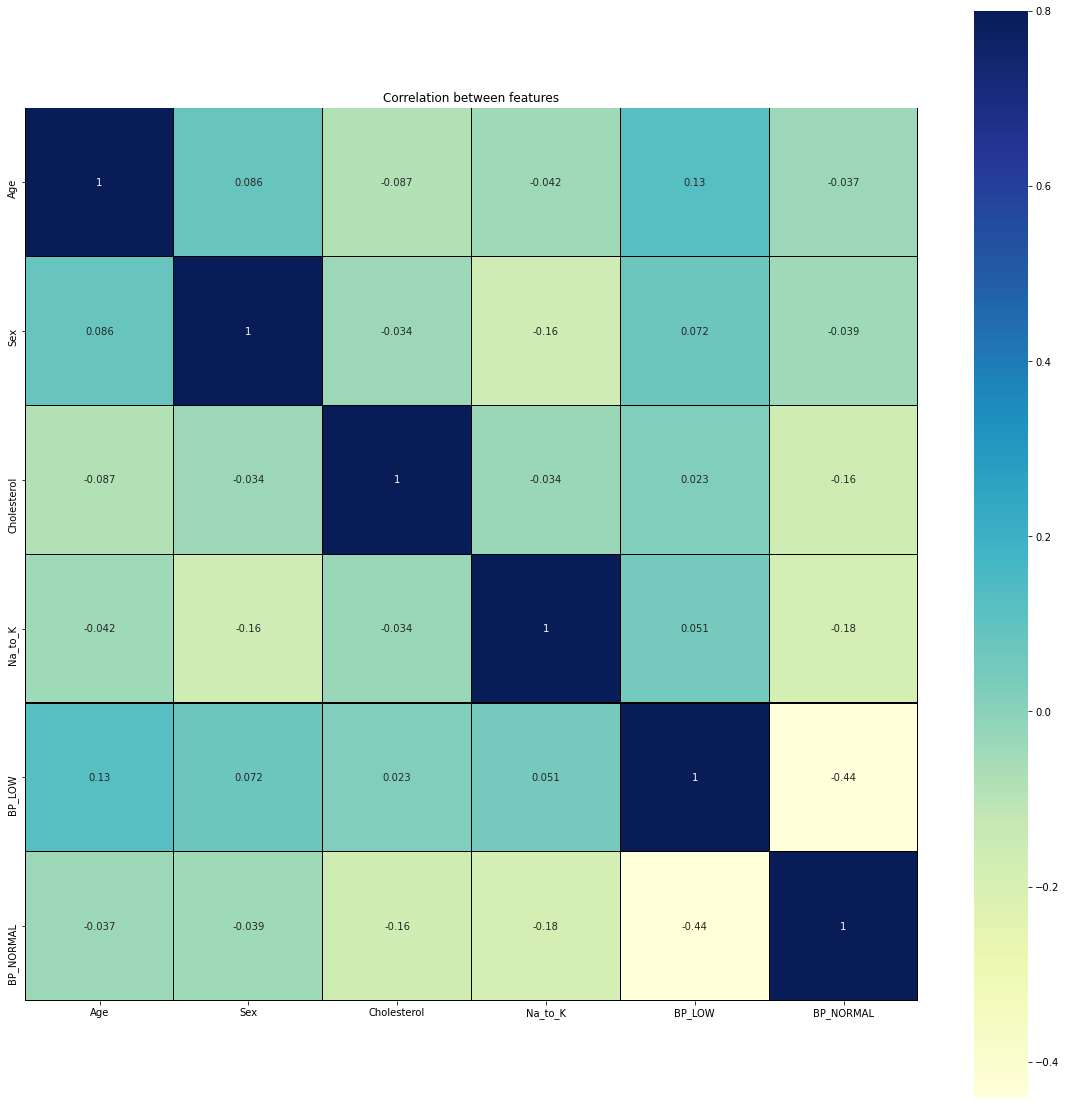

In [39]:

corr = drug_train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

Text(0.5, 1.0, 'Correlation between features')

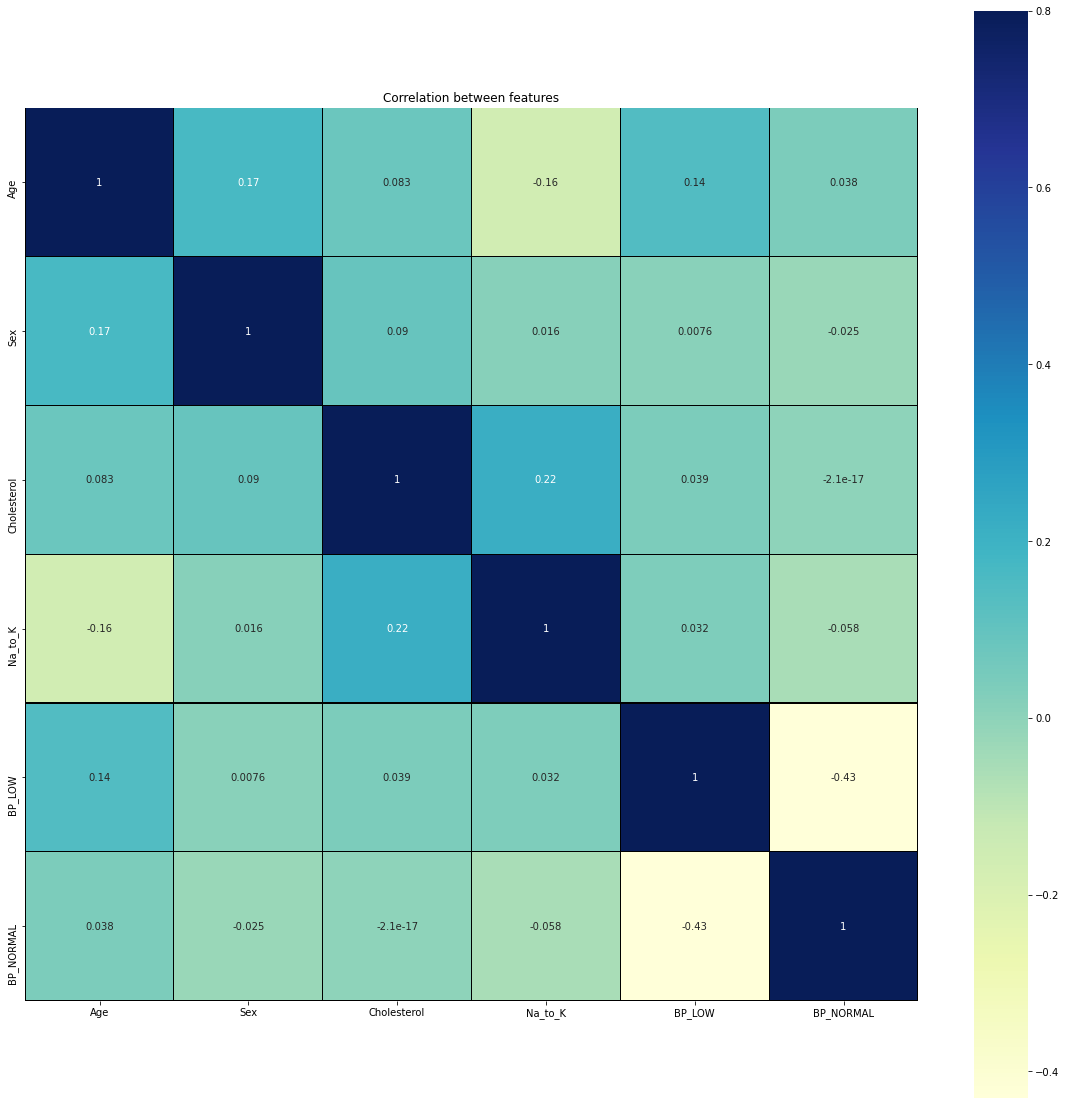

In [40]:
corr = drug_test.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

###  Extract the independent variables to create a dataframe X.

In [41]:
X = pd.DataFrame()
def generate():
    X=drug_train.drop(['Drug'],axis=1) # write your code to create a dataframe of dependent variables excluding 'diagnosis' variable
    return X
X = generate()
X.head()

,Age,Sex,Cholesterol,Na_to_K,BP_LOW,BP_NORMAL
Id,,,,,,
79,32,0,1,10.84000,1,0
197,52,1,0,9.89400,0,1
38,39,0,1,9.70900,0,1
24,33,0,0,33.48600,1,0
122,34,1,0,22.45600,0,1


In [42]:
X_Insaid_test=drug_test
X_Insaid_test.head()

,Age,Sex,Cholesterol,Na_to_K,BP_LOW,BP_NORMAL
Id,,,,,,
95,36,1,1,11.42400,1,0
15,16,0,1,15.51600,0,0
30,18,0,1,8.75000,0,1
158,59,0,0,10.44400,1,0
128,47,1,1,33.54200,1,0


# label encoding

###  Extract the dependent variable into a dataframe 'y' for model prediction.

In [43]:
from sklearn import preprocessing

y = pd.DataFrame()


def generate():
    y = drug_train['Drug']# write your code to create a dataframe which consists only of dependepent variable
    print(y.head())
    return y

y = generate()

    
    
   





Id
79     drugX
197    drugX
38     drugX
24     DrugY
122    DrugY
Name: Drug, dtype: object


In [44]:
from sklearn import preprocessing
# Transforming non numerical labels into numerical labels
encoder = preprocessing.LabelEncoder()

# encoding train labels 
y = encoder.fit_transform(y)
    
   


### Split X and y into train and test dataset.

- Use `test_size` of **0.25**

- Use `random_state` equal to **1**.

In [45]:
from sklearn.model_selection import train_test_split
def generate():
    return train_test_split(X, y, test_size=0.25, random_state=1)     # train test split using train_test_split of 75:25 and random state=1
X_train, X_test, y_train, y_test = generate()

In [46]:
# Dimension of Train and Test set 
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",y_test.shape,"\n")

Dimension of Train set (120, 6)
Dimension of Test set (40,) 



###  Use StandardScaler to normalize X

- **Fit** the scaler on **X**.

- **Return** the transform of **X** obtained using `.transform(X)` on the **scaler**.

In [47]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()              # Your code here
X_train=scaler.fit_transform(X_train) #standardized X_train
X_test=scaler.transform(X_test)       #standardized 

X_Insaid_test_s=scaler.transform(X_Insaid_test)

### Check the shape of X and y of train dataset

In [48]:
def generate():
  # your code here
    return  X_train.shape
generate()

(120, 6)

###  Check the shape of X and y of test dataset

In [49]:
def generate():
    # your code here
    return   y_train.shape
generate()

(120,)

###  Instantiate Logistic Regression Classifier using scikit learn

In [50]:
from sklearn.linear_model import LogisticRegression
def log():
    logreg=LogisticRegression() # initiate the logistic regression model to new variable logreg
    return logreg
logreg = log()

In [51]:
def log():
    logreg.fit(X_train,y_train)
log() 


In [52]:
y_pred_train = pd.DataFrame()
def log():
    y_pred_train = logreg.predict(X_train) # create the model prediction on X_train data using the above created dataframe
    return y_pred_train
y_pred_train = log()

In [53]:
y_pred_test = pd.DataFrame()
def log():
    y_pred_test = logreg.predict(X_test)# create the model prediction on X_test data using the above created dataframe
    return y_pred_test
y_pred_test = log()

In [54]:
y_pred_Insaid = pd.DataFrame()
def log():
    y_pred_Insaid = logreg.predict(X_Insaid_test_s)# create the model prediction on X_test data using the above created dataframe
    return y_pred_Insaid
y_pred_Insaid = log()


In [55]:
print(y_pred_Insaid)

[4 1 4 3 0 0 0 4 1 4 1 4 0 1 2 0 2 4 3 0 2 4 4 0 0 0 3 4 0 0 0 3 3 0 1 0 4
 1 0 1]


In [56]:
X_Insaid_test.columns

Index(['Age', 'Sex', 'Cholesterol', 'Na_to_K', 'BP_LOW', 'BP_NORMAL'], dtype='object')

In [57]:
X_Insaid_test.drop(['Age', 'Sex', 'Cholesterol', 'Na_to_K', 'BP_LOW', 'BP_NORMAL'],axis=1,inplace=True)

In [58]:
y_Insaid=pd.DataFrame(y_pred_Insaid)
y_Insaid.columns = ['Drug']
y_Insaid.head()

,Drug
0,4
1,1
2,4
3,3
4,0


In [59]:
from sklearn import preprocessing

y_Insaid = encoder.inverse_transform(y_pred_Insaid)
# show the dataframe
y_Insaid =pd.DataFrame(y_Insaid)
y_Insaid.columns = ['Drug']


In [60]:
Drug_Insaid= pd.concat ([X_Insaid_test,y_Insaid.set_index(X_Insaid_test.index)], axis=1)
Drug_Insaid.head()

,Drug
Id,
95,drugX
15,drugA
30,drugX
158,drugC
128,DrugY


In [61]:
import numpy as np
from sklearn.metrics import accuracy_score

preds2 = np.where(logreg.predict_proba(X_test)[:,1]> 0.25,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))# compute and print the accuracy score
    

Accuracy score for test data is: 0.9


In [62]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       1.00      1.00      1.00         4
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4
           4       1.00      0.77      0.87        13

    accuracy                           0.90        40
   macro avg       0.96      0.89      0.91        40
weighted avg       0.92      0.90      0.90        40



In [63]:
# building confusion matrix
from sklearn.metrics import confusion_matrix
y_unique = np.unique(y_train)
mcm=confusion_matrix(y_train,y_pred_train,labels = y_unique)
mcm

array([[60,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0],
       [ 0,  0, 10,  0,  0],
       [ 0,  0,  0,  7,  0],
       [ 2,  0,  0,  0, 28]], dtype=int64)

<AxesSubplot:>

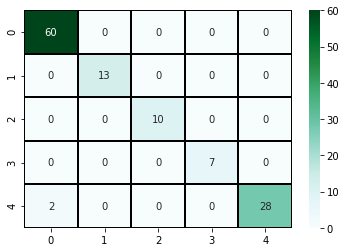

In [64]:
import seaborn as sns
sns.heatmap(mcm, annot=True,cmap='BuGn',linewidths=1, linecolor='black')

**Observations**
- Diagonal values are TP of each class , 0 belongs to DrugY and 4 belongs to DrugX and 1, 2 and 3 are drugA,drugB and drugC respectively
- Out of 120 our logistic regression classifier has classified the **all drugs correctly**, except **2 of drugX are wrongly classified as drugY**

In [65]:
# building confusion matrix
from sklearn.metrics import confusion_matrix
y_unique = np.unique(y_test)
mcm1=confusion_matrix(y_test,y_pred_test,labels = y_unique)
mcm1

array([[16,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 1,  0,  2,  0,  0],
       [ 0,  0,  0,  4,  0],
       [ 3,  0,  0,  0, 10]], dtype=int64)

<AxesSubplot:>

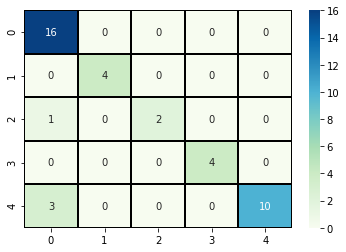

In [66]:
import seaborn as sns
sns.heatmap(mcm1, annot=True,cmap='GnBu',linewidths=1, linecolor='black')

**Observations**
- Diagonal values are TP of each class , 0 belongs to DrugY and 4 belongs to DrugX and 1, 2 and 3 are drugA,drugB and drugC respectively same as above
- Out of 40 test samples, our logistic regression classifier has classified the **all of drugY,drugA and drugC** correctly, however, **3 of drugX and 1 of drugB** are **wrongly** classified as drugY 

###  Instantiate RandomForestClassifier using scikit learn

- Use `random_state` equal to **0**.

In [67]:
from sklearn.ensemble import RandomForestClassifier
def generate():
    rfc =  RandomForestClassifier(random_state=0)## instantiate RandomForestClassifer to new variable rfc
    return rfc
rfc = generate()

### Fit the classifier model on X_train and y_train . 

In [68]:

rfc.fit(X_train,y_train) # code to fit the model 
    

RandomForestClassifier(random_state=0)

###  Use the model for making predictions on X_test.

In [69]:
predictions = pd.DataFrame()
def generate():
    # predictions
    predictions = rfc.predict(X_test)# create the model prediction on X_test data using the above created dataframe
    return predictions
predictions = generate()

In [70]:
predictions_Insaid = pd.DataFrame()
def generate():
    # predictions
    predictions_Insaid = rfc.predict(X_Insaid_test_s)# create the model prediction on X_test data using the above created dataframe
    return predictions_Insaid
predictions_Insaid = generate()

In [71]:
print(predictions_Insaid)

[4 0 4 3 0 0 0 4 1 4 1 4 0 1 2 0 2 4 3 0 2 4 4 0 0 0 3 4 0 4 0 3 3 0 1 0 4
 1 0 1]


In [72]:
from sklearn import preprocessing

Insaid_drug_test = encoder.inverse_transform(predictions_Insaid)
# show the dataframe
Insaid_drug_test =pd.DataFrame(Insaid_drug_test)
Insaid_drug_test.columns = ['Drug']

In [73]:

DrugRFC_Insaid= pd.concat ([X_Insaid_test,Insaid_drug_test.set_index(X_Insaid_test.index)], axis=1)
DrugRFC_Insaid.head()

,Drug
Id,
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


In [74]:
# building confusion matrix
from sklearn.metrics import confusion_matrix
y_unique = np.unique(y_train)
mcmRFC=confusion_matrix(y_test,predictions,labels = y_unique)
mcmRFC


array([[16,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  4,  0],
       [ 1,  0,  0,  0, 12]], dtype=int64)

<AxesSubplot:>

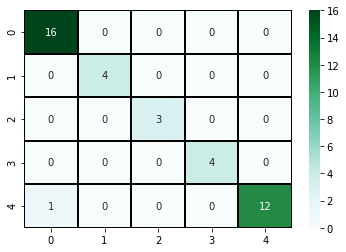

In [75]:
import seaborn as sns
sns.heatmap(mcmRFC, annot=True,cmap='BuGn',linewidths=1, linecolor='black')

**Observations**
- Diagonal values are TP of each class , 0 belongs to DrugY and 4 belongs to DrugX and 1, 2 and 3 are drugA,drugB and drugC respectively
- Out of 40 our logistic regression classifier has classified the **all drugs correctly**, except **1 of drugX are wrongly classified as drugY**

In [76]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      0.92      0.96        13

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.99        40
weighted avg       0.98      0.97      0.97        40



In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
import sklearn.metrics as metrics 

In [78]:
#Cross Validation 
rfc_cv_score = cross_val_score(rfc, X, y, cv=5, scoring='accuracy')

In [79]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[16  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 12]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      0.92      0.96        13

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.99        40
weighted avg       0.98      0.97      0.97        40



=== All AUC Scores ===
[1.      1.      1.      0.96875 1.     ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.99375


### Use RandomizedSearchCV  for hyperparameter tuning of your random forest classifier.

- Keep `n_iter` as **50** and `random_state` as **0** for the RandomizedSearchCV.

- For the parameter grid use the below values:

    - `max_depth`: **range(2, 5)**                            

    - `min_samples_split`: **sp_randint(2, 11)**

    - `min_samples_leaf`: **sp_randint(1, 11)**

    - `n_estimators`: **[100, 400, 700, 1000, 1500]**

    - `max_features`: **['sqrt', 'log2', None]**

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

max_depth=range(2, 5)
min_samples_split=sp_randint(2, 11)
min_samples_leaf=sp_randint(1, 11)
n_estimators =[100, 400, 700, 1000, 1500]
max_features=['sqrt', 'log2', None]

r_grid={ 'n_estimators':  n_estimators,
            'max_depth': max_depth,

            'min_samples_split': min_samples_split,

            'min_samples_leaf':min_samples_leaf, 

            'max_features':  max_features}


def generate():
    rfc_random = RandomizedSearchCV(estimator = rfc,param_distributions=r_grid, n_iter = 50, random_state=0)  # your code here
    return rfc_random    # variable for RandomizedSearchCV model
rfc_random = generate()

In [81]:
rfc_random.fit(X_train, y_train);

In [82]:
#Hyperparameter Tuning
print(rfc_random.best_params_)

{'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 700}


In [83]:
best_random=rfc_random.best_estimator_
#Hyperparameter Tuning
print(best_random.score(X_test , y_test))

0.975


In [84]:
pred_y_test = pd.DataFrame()
def generate():
    # predictions
    pred_y_test = rfc_random.predict(X_test)# create the model prediction on X_test data using the above created dataframe
    return pred_y_test
pred_y_test = generate()

In [85]:
pred_Insaid_y = pd.DataFrame()
def generate():
    # predictions
    pred_Insaid_y = rfc_random.predict(X_Insaid_test_s)# create the model prediction on X_test data using the above created dataframe
    return pred_Insaid_y
pred_Insaid_y = generate()

In [86]:
print(pred_Insaid_y)

[4 0 4 3 0 0 0 4 1 4 1 4 0 1 2 0 2 4 3 0 2 4 4 0 0 0 3 4 0 4 0 3 3 0 1 0 4
 1 0 1]


In [87]:
from sklearn import preprocessing

Insaid_drug_test_RFC_Random = encoder.inverse_transform(pred_Insaid_y)
Insaid_drug_test_RFC_Random=pd.DataFrame(Insaid_drug_test_RFC_Random)
Insaid_drug_test_RFC_Random.columns = ['Drug']
Insaid_drug_test_RFC_Random.head()

,Drug
0,drugX
1,DrugY
2,drugX
3,drugC
4,DrugY


In [88]:
Drug_Insaid_RFC_Random= pd.concat ([X_Insaid_test,Insaid_drug_test_RFC_Random.set_index(X_Insaid_test.index)], axis=1)
Drug_Insaid_RFC_Random.head()

,Drug
Id,
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


In [89]:
Drug_Insaid_RFC_Random.to_csv("submission_Insaid_drug_test_RFC_Random.csv",index=True, header=False)

In [90]:
from sklearn import preprocessing

Insaid_drug_test_rfc = encoder.inverse_transform(pred_Insaid_y)
# show the dataframe
Insaid_drug_test_rfc =pd.DataFrame(Insaid_drug_test_rfc)
Insaid_drug_test_rfc.columns = ['Drug']

In [91]:
# building confusion matrix
from sklearn.metrics import confusion_matrix
y_unique = np.unique(y_train)
mcmRFC_Random=confusion_matrix(y_test,pred_y_test,labels = y_unique)
mcmRFC_Random

array([[16,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  4,  0],
       [ 1,  0,  0,  0, 12]], dtype=int64)

<AxesSubplot:>

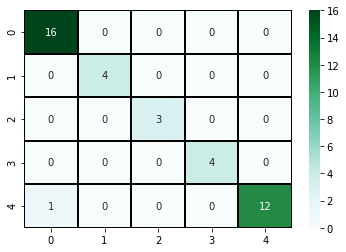

In [92]:
import seaborn as sns
sns.heatmap(mcmRFC_Random, annot=True,cmap='BuGn',linewidths=1, linecolor='black')

In [93]:
print(classification_report(y_test,pred_y_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      0.92      0.96        13

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.99        40
weighted avg       0.98      0.97      0.97        40



### Perform model evaluation on the test set using accuracy score.

In [94]:
import numpy as np
from sklearn.metrics import accuracy_score

preds2 = np.where(rfc_random.predict_proba(X_test)[:,1]> 0.25,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,pred_y_test))# compute and print the accuracy score
    


Accuracy score for test data is: 0.975


###  Fit the Gaussian NB model on X_train and y_train also print the time taken by the classifier. 

In [95]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [96]:
pred_y_test_GNB = pd.DataFrame()
def generate():
    # predictions
    pred_y_test_GNB =classifier.predict(X_test)# create the model prediction on X_test data using the above created dataframe
    return pred_y_test_GNB
pred_y_test_GNB = generate()


In [97]:
pred_Insaid_y_GNB = pd.DataFrame()
def generate():
    # predictions
    pred_Insaid_y_GNB = classifier.predict(X_Insaid_test_s)# create the model prediction on X_test data using the above created dataframe
    return pred_Insaid_y_GNB
pred_Insaid_y_GNB = generate()

In [98]:
print(pred_Insaid_y_GNB)

[4 1 4 3 0 2 0 4 1 4 1 4 3 1 2 0 2 4 3 0 2 0 4 0 0 0 3 4 0 0 0 3 3 0 1 0 0
 1 1 1]


In [99]:
from sklearn import preprocessing

Insaid_drug_test_GNB = encoder.inverse_transform(pred_Insaid_y_GNB)
Insaid_drug_test_GNB=pd.DataFrame(Insaid_drug_test_GNB)
Insaid_drug_test_GNB.columns = ['Drug']
Insaid_drug_test_GNB.head()

,Drug
0,drugX
1,drugA
2,drugX
3,drugC
4,DrugY


In [100]:
Drug_Insaid_GNB= pd.concat ([X_Insaid_test,Insaid_drug_test_GNB.set_index(X_Insaid_test.index)], axis=1)
Drug_Insaid_GNB.head()

,Drug
Id,
95,drugX
15,drugA
30,drugX
158,drugC
128,DrugY


In [101]:
Drug_Insaid_GNB.to_csv("submission_Insaid_drug_test_GNB.csv",index=True, header=False)

In [102]:
# building confusion matrix
from sklearn.metrics import confusion_matrix
y_unique = np.unique(y_train)
mcmGNB=confusion_matrix(y_test,pred_y_test,labels = y_unique)
mcmGNB

array([[16,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  4,  0],
       [ 1,  0,  0,  0, 12]], dtype=int64)

<AxesSubplot:>

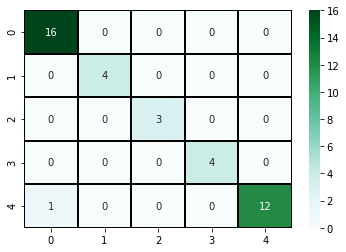

In [103]:
import seaborn as sns
sns.heatmap(mcmGNB, annot=True,cmap='BuGn',linewidths=1, linecolor='black')

In [104]:
print(classification_report(y_test,pred_y_test_GNB))

              precision    recall  f1-score   support

           0       0.79      0.69      0.73        16
           1       0.57      1.00      0.73         4
           2       0.75      1.00      0.86         3
           3       0.80      1.00      0.89         4
           4       1.00      0.77      0.87        13

    accuracy                           0.80        40
   macro avg       0.78      0.89      0.82        40
weighted avg       0.83      0.80      0.80        40



In [105]:
import numpy as np
from sklearn.metrics import accuracy_score

preds2 = np.where(rfc_random.predict_proba(X_test)[:,1]> 0.25,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,pred_y_test_GNB))# compute and print the accuracy score
    

Accuracy score for test data is: 0.8


# Inference from all models

- Classifier models were tried, out of all models, Random Forest Classifier fine tuned by Randomized SearchCV gave **highest accuracy of 0.975** 
- While, **Naive Bayes gave accuracy of 0.8**